In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Задача про классификацию грибов

In [2]:
mush_df = pd.read_csv('training_mush.csv')
mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [3]:
X = mush_df[mush_df.columns[:-1]]
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


In [5]:
y = mush_df['class']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [6]:
clf = RandomForestClassifier(random_state=0)

In [7]:
params = {
    'n_estimators': range(10, 50, 10),
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 9, 2),
}

In [8]:
grid_search_cv_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [11]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [12]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [13]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [14]:
feature_importances_df = pd.DataFrame(
    {
        'features': list(X), 
        'feature_importances': grid_search_cv_clf.best_estimator_.feature_importances_
    }
).sort_values('feature_importances', ascending=False)
feature_importances_df

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [15]:
best_clf = grid_search_cv_clf.best_estimator_

In [16]:
test_mush_df = pd.read_csv('testing_mush.csv')
test_mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [19]:
test_mush_df.shape

(2031, 22)

In [18]:
prediction = pd.DataFrame({'class': best_clf.predict(test_mush_df)})
prediction.head()

,class
0,0
1,0
2,1
3,1
4,1


In [20]:
prediction.shape

(2031, 1)

In [23]:
predicted_test_mush_df = test_mush_df.copy()
predicted_test_mush_df['class'] = best_clf.predict(test_mush_df)
predicted_test_mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,0,3,8,1,3,1,0,0,4,0,...,7,7,0,2,1,4,2,3,3,0
1,5,3,4,1,5,1,0,0,10,1,...,6,6,0,2,1,4,3,5,0,0
2,3,3,4,0,8,1,0,1,0,1,...,7,6,0,2,1,0,7,4,4,1
3,3,2,2,0,7,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
4,3,2,2,0,8,1,0,1,0,1,...,6,6,0,2,1,0,7,4,4,1


In [29]:
predicted_test_mush_df['class'].value_counts()

class
0    1055
1     976
Name: count, dtype: int64

In [30]:
predicted_test_mush_df.rename({'class': 'predicted_class'}, axis=1, inplace=True)

In [31]:
predicted_test_mush_df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'predicted_class'],
      dtype='object')

In [32]:
test_mush_y_df = pd.read_csv('testing_y_mush.csv')
test_mush_y_df.head()

,class
0,0
1,0
2,1
3,1
4,1


In [36]:
test_mush_y_df.shape

(2031, 1)

In [33]:
predicted_test_mush_df['check_class'] = test_mush_y_df['class']

In [34]:
predicted_test_mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predicted_class,check_class
0,0,3,8,1,3,1,0,0,4,0,...,7,0,2,1,4,2,3,3,0,0
1,5,3,4,1,5,1,0,0,10,1,...,6,0,2,1,4,3,5,0,0,0
2,3,3,4,0,8,1,0,1,0,1,...,6,0,2,1,0,7,4,4,1,1
3,3,2,2,0,7,1,0,1,0,1,...,7,0,2,1,0,7,4,0,1,1
4,3,2,2,0,8,1,0,1,0,1,...,6,0,2,1,0,7,4,4,1,1


In [39]:
confusion_matrix = confusion_matrix(
    predicted_test_mush_df.check_class, 
    predicted_test_mush_df.predicted_class, 
    labels=best_clf.classes_
)

In [44]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [49]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, 
    display_labels=best_clf.classes_,
)

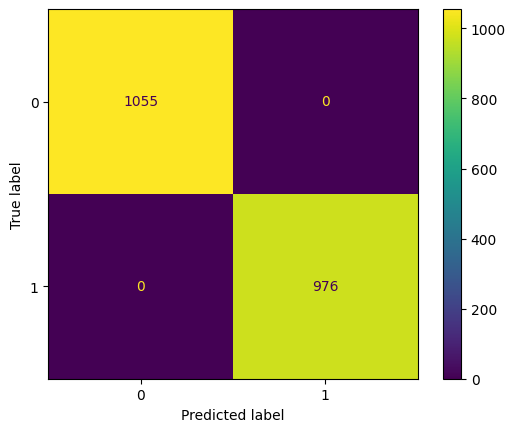

In [41]:
disp.plot()

#### Задача про жуков

In [50]:
invasion_df = pd.read_csv('invasion.csv')
invasion_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [51]:
invasion_df.shape

(500, 7)

In [52]:
X_train = invasion_df[invasion_df.columns[1:]]
y_train = invasion_df['class']

In [53]:
clf_rf = RandomForestClassifier(random_state=0)

In [54]:
params = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(1, 12, 2),
    'min_samples_leaf': range(1, 7),
    'min_samples_split': range(2, 9, 2),
}

In [55]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)

In [56]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 100, 10)})

In [58]:
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [57]:
best_clf_rf = grid_search_cv_clf.best_estimator_

In [59]:
oper_info_df = pd.read_csv('operative_information.csv')
oper_info_df.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [61]:
predicted_info_df = oper_info_df.copy()
predicted_info_df['predicted_class'] = best_clf_rf.predict(oper_info_df)
predicted_info_df.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume,predicted_class
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224,fighter
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130,transport
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556,transport
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829,transport
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813,fighter


In [64]:
predicted_info_df.predicted_class.value_counts()

predicted_class
fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

In [65]:
feature_importances_df = pd.DataFrame(
    {
        'features': list(X_train), 
        'feature_importances': best_clf_rf.feature_importances_
    }
).sort_values('feature_importances', ascending=False)
feature_importances_df

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


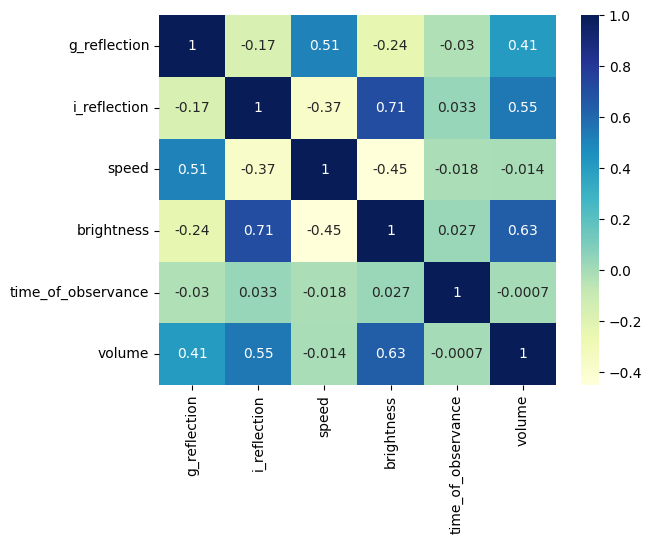

In [71]:
# Возможно, первый фактор неверен, потому что имеет сильную корреляцию со вторым
# plotting correlation heatmap 
dataplot = sns.heatmap(
    predicted_info_df[predicted_info_df.columns[:-1]].corr(), 
    cmap="YlGnBu", 
    annot=True
) 

#### Задача про глубины космоса

In [72]:
cosmo_regions = pd.read_csv('space_can_be_a_dangerous_place.csv')
cosmo_regions.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [79]:
cosmo_regions.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


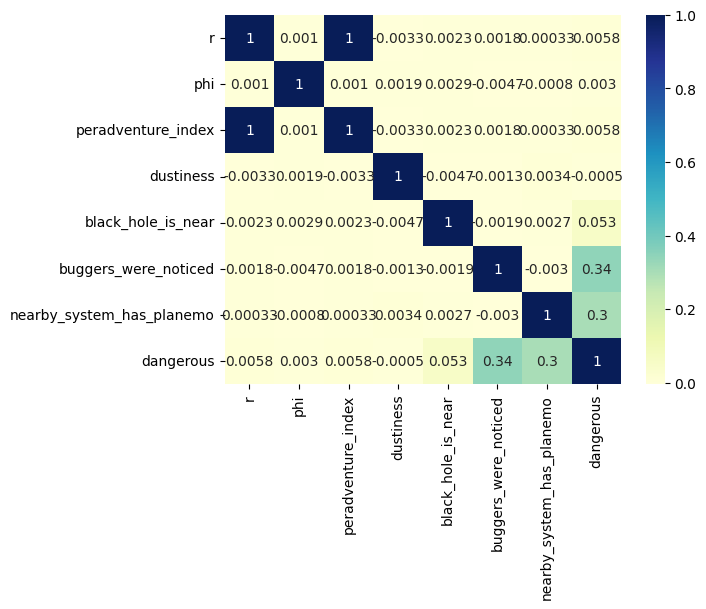

In [80]:
cosmo_dataplot = sns.heatmap(
    cosmo_regions.corr(), 
    cmap="YlGnBu", 
    annot=True
) 